# Wine Quality Prediction 🍷

### Data Details
##### fixed acidity
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
##### volatile acidity
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
##### citric acid
found in small quantities, citric acid can add 'freshness' and flavor to wines
##### residual sugar
the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines
##### chlorides 
the amount of salt in the wine
##### free sulfur dioxide
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents
##### total sulfur dioxide
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2
##### density
the density of water is close to that of water depending on the percent alcohol and sugar content
##### pH
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the
##### sulphates
a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
##### alcohol
the percent alcohol content of the wine
##### quality
output variable (based on sensory data, score between 0 and 10)

### Importing different dependencies

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split ,RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from fractions import Fraction

### Data Collection 

In [18]:
wine_quality = pd.read_csv('winequality-red.csv')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
wine_quality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
wine_quality.shape

(1599, 12)

### Data Visulization 

In [22]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


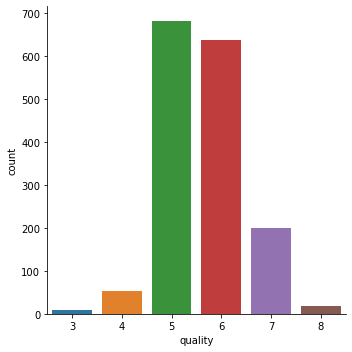

In [23]:
# number of values for each quantity
sns.catplot(x='quality', data=wine_quality, kind='count');

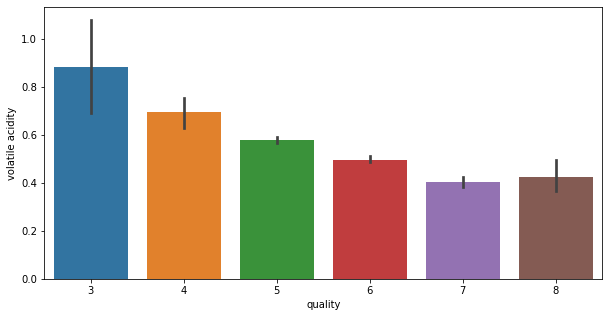

In [24]:
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_quality);

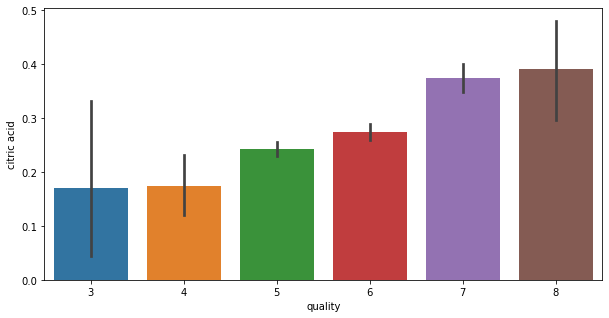

In [25]:
plot2 = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='citric acid', data=wine_quality);

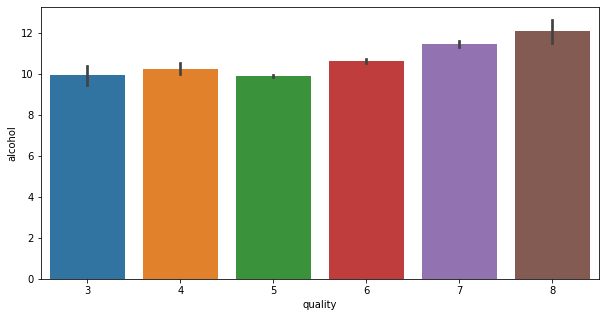

In [26]:
plot3 = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='alcohol', data=wine_quality);

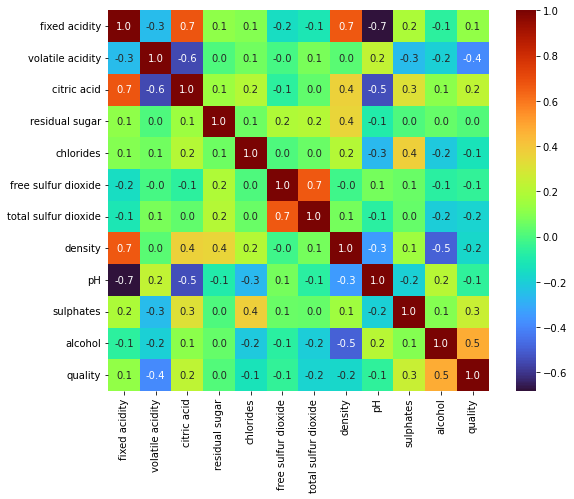

In [27]:
correlation = wine_quality.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap='turbo');

## Machine learning

In [28]:
x = wine_quality.drop('quality', axis=1)

#### Label Binarization

In [29]:
y = wine_quality['quality'].apply(lambda y_value:1 if y_value >=7 else 0)

In [30]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [31]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# spliting data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# getting the shapes

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [33]:
# selecting the model we want to use

model = RandomForestClassifier()

# fitting the model on training sets 

model.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
# predicting x_test

y_preds = model.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [35]:
# accuracy on test data

accuracy = accuracy_score(y_test, y_preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.928125


* Now the model can predict with 93% accuracy
* So we can give  different label numbers to predict the wine quality in terms of 0 and 1

In [38]:
input_data = list(map(float, input('Please Enter all required Data to get accurate result: ').split()))

input_data_numpy = np.asarray(input_data)

reshaped_data = input_data_numpy.reshape(1, -1)

prediction = model.predict(reshaped_data)

if prediction[0] == 1:
    print('[1] - Wine is of Good Quality ')
else:
    print('[0]- Wine is of Bad Quality ')

Please Enter all required Data to get accurate result: 7.3 0.65 0.0 1.2 0.065 15.0 21.0 0.9946 3.39 0.47 10.0
[1] - Wine is of Good Quality 


In [39]:
model.feature_importances_

array([0.07099231, 0.10675782, 0.10743065, 0.06993022, 0.06889597,
       0.0609328 , 0.07711579, 0.0939684 , 0.05792849, 0.11779852,
       0.16824901])

In [44]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

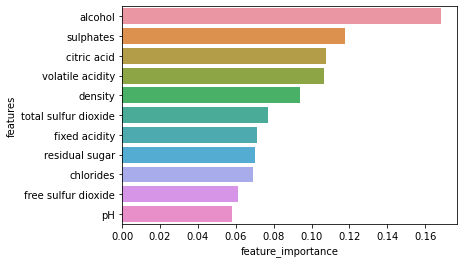

In [45]:
plot_features(x_train.columns, model.feature_importances_)